In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
match_data = pd.read_csv('matchDataProcessed.csv')
wins = pd.read_csv('matchDataWins.csv')

In [3]:
win_team1 = pd.DataFrame(wins['win_team1'])
win_team2 = pd.DataFrame(wins['win_team2'])

In [5]:
#Graficar la cantidad de victrorias con respecto a las derrotas de un equipo
sns.countplot(x=win_team1)

ValueError: If using all scalar values, you must pass an index

In [6]:
# Elimina las columnas de firstBaron de los datos
match_data = match_data.drop(['firstBaronTeam1', 'firstBaronTeam2'], axis=1)

In [4]:
# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
predictors = match_data
predictors_train, predictors_test, wins_team1_train, wins_team1_test, wins_team2_train, wins_team2_test = train_test_split(predictors, win_team1, win_team2, test_size=0.2, random_state=42)

In [5]:
# Inicializa el clasificador
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, min_impurity_decrease=0.0001)

# Entrena el modelo
random_forest_model.fit(predictors_train, wins_team1_train)

D:\Facultad\3_año\Inteligencia_Artificial_1\Proyecto_Final_IA\venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(min_impurity_decrease=0.0001, n_jobs=-1, random_state=42)

In [6]:
wins_pred_test = random_forest_model.predict(predictors_test)
wins_pred_train = random_forest_model.predict(predictors_train)


# Evalúa el rendimiento del modelo
accuracy = accuracy_score(wins_team1_test, wins_pred_test)
print(f'Accuracy in test data: {accuracy}')
accuracy = accuracy_score(wins_team1_train, wins_pred_train)
print(f'Accuracy in train data: {accuracy}')

Accuracy in test data: 0.847807433500429
Accuracy in train data: 0.8525815447494101


Matriz de Confusión:
             Predicted Win  Predicted Lose
Actual Win            8198            2964
Actual Lose           2732            8249


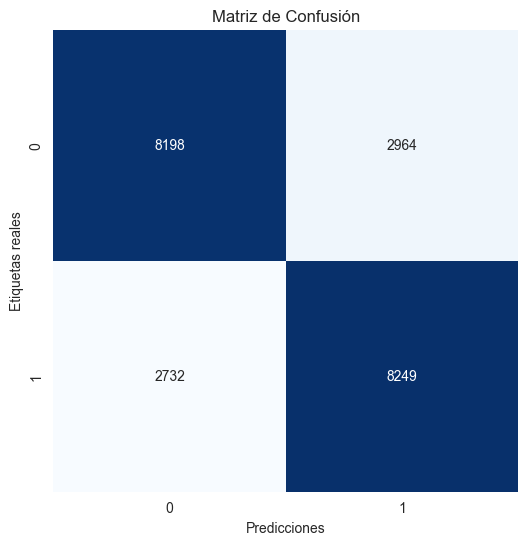

In [10]:
# Crear la matriz de confusión para datos de prueba del team1
conf_matrix = confusion_matrix(wins_team1_test, wins_pred_test)

# Crear un DataFrame de pandas para visualizar mejor la matriz de confusión
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual Win', 'Actual Lose'], columns=['Predicted Win', 'Predicted Lose'])

# Imprimir la matriz de confusión
print("Matriz de Confusión:")
print(conf_matrix_df)

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=np.unique(wins_pred_test),
            yticklabels=np.unique(wins_team1_test))
plt.xlabel('Predicciones')
plt.ylabel('Etiquetas reales')
plt.title('Matriz de Confusión')
plt.show()

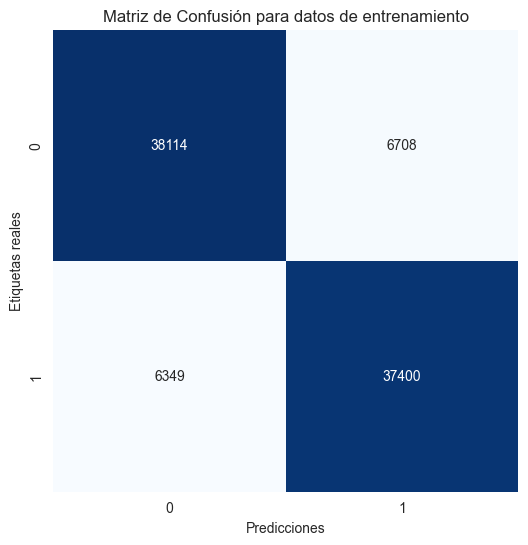

In [9]:
# Crear matriz de confusión para datos de entrenamiento del team1
conf_matrix = confusion_matrix(wins_team1_train, wins_pred_train)

# Crear un DataFrame de pandas para visualizar mejor la matriz de confusión
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual Win', 'Actual Lose'], columns=['Predicted Win', 'Predicted Lose'])

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=np.unique(wins_pred_train),
            yticklabels=np.unique(wins_team1_train))
plt.xlabel('Predicciones')
plt.ylabel('Etiquetas reales')
plt.title('Matriz de Confusión para datos de entrenamiento')
plt.show()

In [10]:
# Calcular la precisión para team1: 
precision = precision_score(wins_team1_test, wins_pred_test, average='weighted')

# Calcular la sensibilidad (recall) para team1: 
recall = recall_score(wins_team1_test, wins_pred_test, average='weighted')

# Calcular la puntuación F1 para team1: 
f1 = f1_score(wins_team1_test, wins_pred_test, average='weighted')

# Calcular la exactitud para team1: 
accuracy = accuracy_score(wins_team1_test, wins_pred_test)

# Imprimir las métricas
print(f'Precisión: {precision:.4f}')
print(f'Sensibilidad (Recall): {recall:.4f}')
print(f'Puntuación F1: {f1:.4f}')
print(f'Exactitud: {accuracy:.4f}')

Precisión: 0.8479
Sensibilidad (Recall): 0.8478
Puntuación F1: 0.8478
Exactitud: 0.8478


In [11]:
# Calcular métricas para datos de entrenamiento
precision = precision_score(wins_team1_train, wins_pred_train, average='weighted')
recall = recall_score(wins_team1_train, wins_pred_train, average='weighted')
f1 = f1_score(wins_team1_train, wins_pred_train, average='weighted')
accuracy = accuracy_score(wins_team1_train, wins_pred_train)

# Imprimir las métricas
print(f'Precisión: {precision:.4f}')
print(f'Sensibilidad (Recall): {recall:.4f}')
print(f'Puntuación F1: {f1:.4f}')
print(f'Exactitud: {accuracy:.4f}')

Precisión: 0.8526
Sensibilidad (Recall): 0.8526
Puntuación F1: 0.8526
Exactitud: 0.8526


In [13]:
# Ver la importancia de cada columna
feature_importances = random_forest_model.feature_importances_
print('Importancia de las características:')
sorted(feature_importances, reverse=True)
for i, importance in enumerate(feature_importances):
     print(f'{random_forest_model.feature_names_in_[i]}: {importance}')

Importancia de las características:
gameDuration: 0.06432498302768255
firstBloodTeam1: 0.0246961237703711
firstTowerTeam1: 0.2516518090809975
firstDragonTeam1: 0.10436881042786547
firstRiftHeraldTeam1: 0.058455759347992714
ban1Team1: 0.00010410811839924839
ban2Team1: 4.368675236554082e-05
ban3Team1: 4.0100014060186553e-05
ban4Team1: 0.00012494407046286323
ban5Team1: 3.612145174472133e-05
champ1Team1: 0.00015459038521918497
champ2Team1: 0.00014403371454733236
champ3Team1: 0.00011606587669297849
champ4Team1: 5.267139057947495e-05
champ5Team1: 8.144856321667023e-05
firstBloodTeam2: 0.030351613472680474
firstTowerTeam2: 0.2660338836835655
firstDragonTeam2: 0.0897615951006233
firstRiftHeraldTeam2: 0.10789654322249968
ban1Team2: 5.32919497314746e-05
ban2Team2: 8.035779769281799e-05
ban3Team2: 9.115103379729402e-05
ban4Team2: 6.54370664156124e-05
ban5Team2: 0.0001727720648559719
champ1Team2: 9.28070382525591e-05
champ2Team2: 0.00010991886663571977
champ3Team2: 0.0001535801553678787
champ4Team